In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats#for statistical asnlysis
data = pd.read_csv('D:\JOY\J AMITY\Machine Learning/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
d1=data.copy()

In [3]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
import tensorflow as tf

In [5]:
d1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


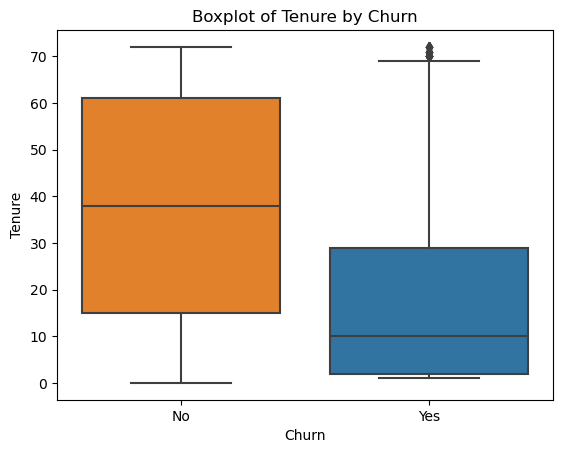

In [6]:
sns.boxplot(data=d1, x="Churn", y="tenure", palette=["#ff7f0e", "#1f77b4"])
plt.title('Boxplot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

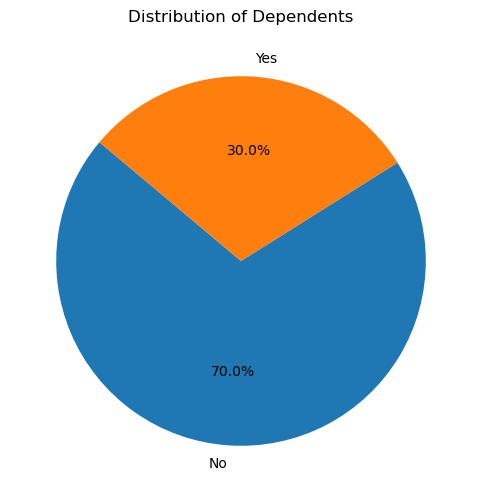

In [7]:
dependents_counts = data['Dependents'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(dependents_counts, labels=dependents_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Dependents')
plt.show()

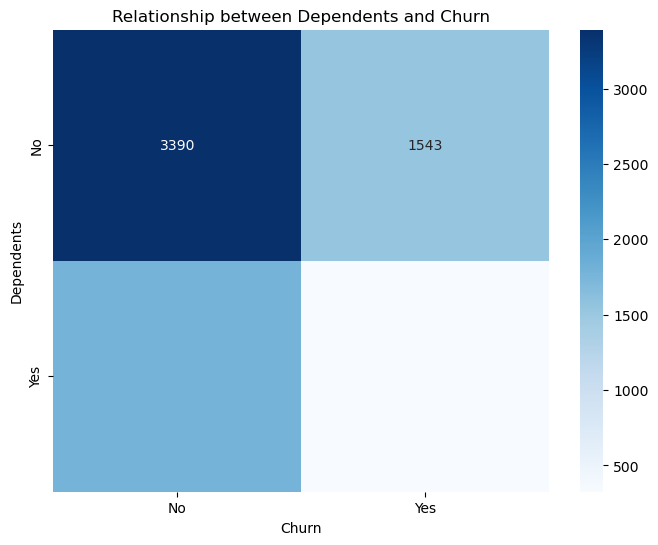

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of 'Dependents' and 'Churn'
cross_tab = pd.crosstab(data['Dependents'], data['Churn'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship between Dependents and Churn')
plt.xlabel('Churn')
plt.ylabel('Dependents')
plt.show()


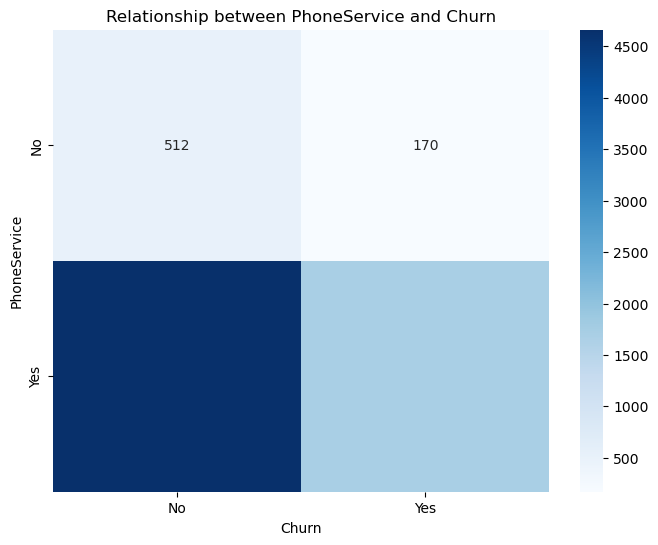

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation of 'Dependents' and 'Churn'
cross_tab = pd.crosstab(data['PhoneService'], data['Churn'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title('Relationship between PhoneService and Churn')
plt.xlabel('Churn')
plt.ylabel('PhoneService')
plt.show()


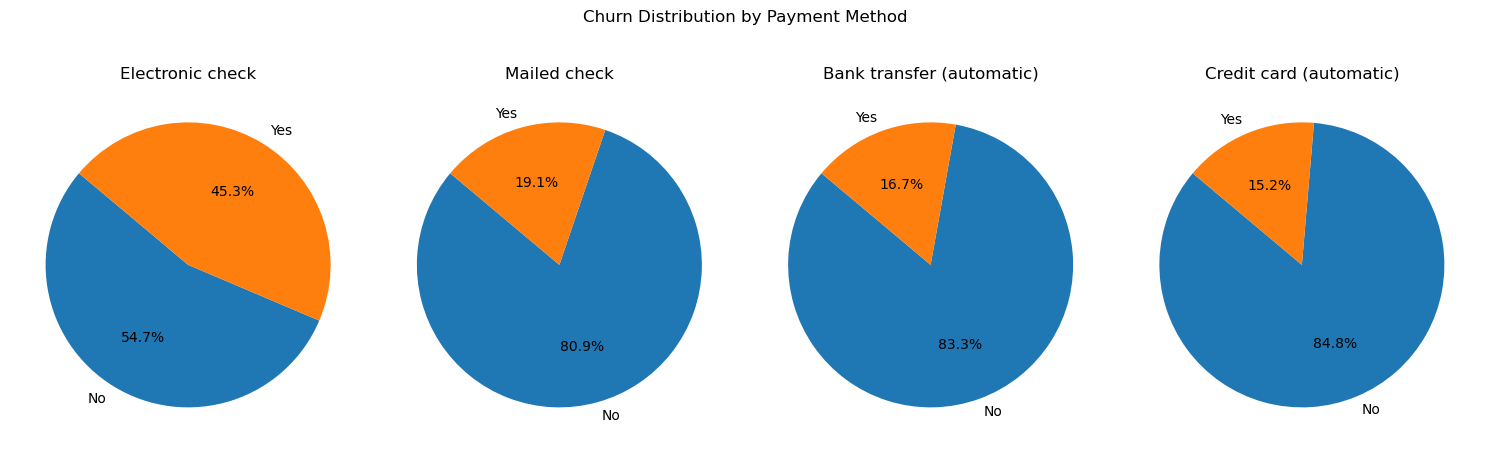

In [10]:
payment_methods = data['PaymentMethod'].unique()

fig, axs = plt.subplots(1, len(payment_methods), figsize=(15, 5))

for i, method in enumerate(payment_methods):

    method_data = data[data['PaymentMethod'] == method]
    
    churn_counts = method_data['Churn'].value_counts()
    
    axs[i].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(method)

fig.suptitle('Churn Distribution by Payment Method')

# Adjust layout
plt.tight_layout()
plt.show()


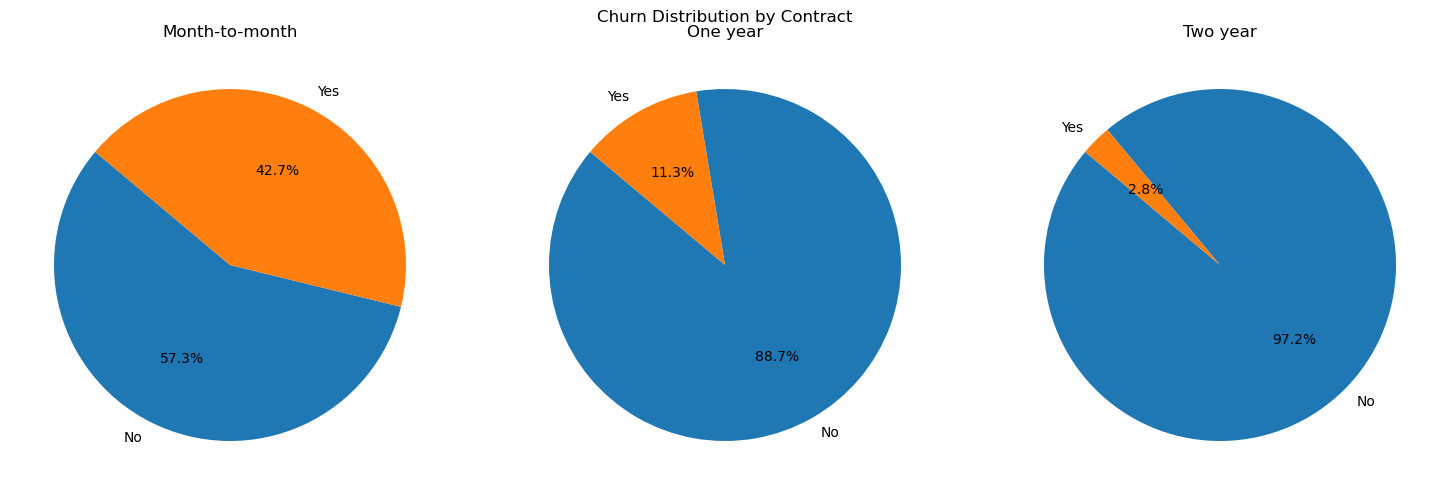

In [11]:
contracts = data['Contract'].unique()

fig, axs = plt.subplots(1, len(contracts), figsize=(15, 5))

for i, contract in enumerate(contracts):

    contract_data = data[data['Contract'] == contract]
    

    churn_counts = contract_data['Churn'].value_counts()
    
    axs[i].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(contract)

fig.suptitle('Churn Distribution by Contract')

plt.tight_layout()
plt.show()


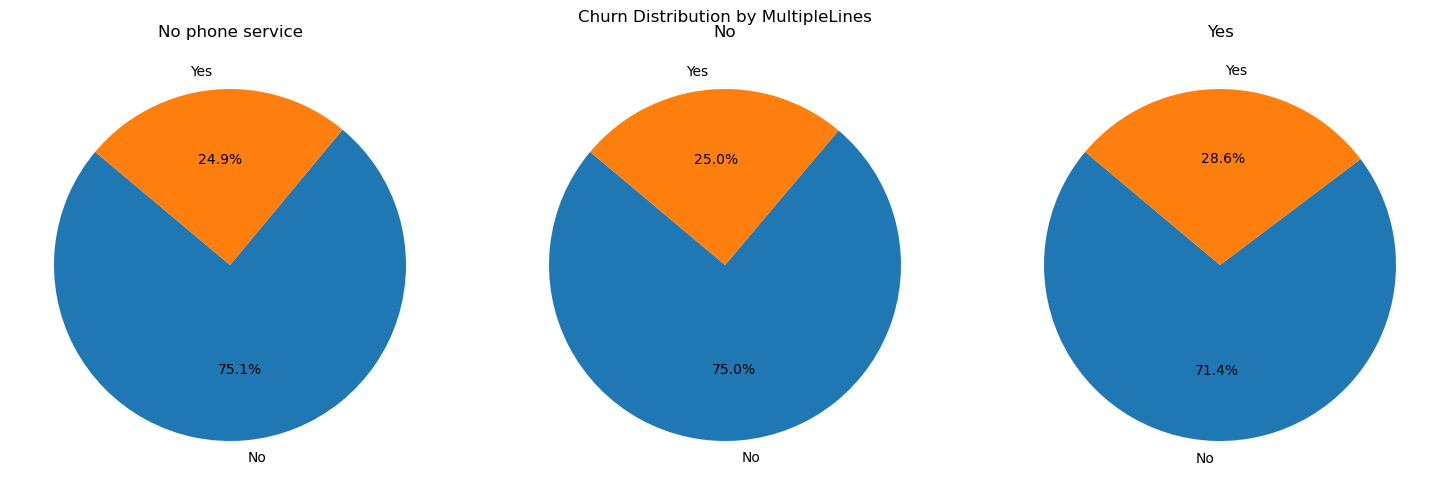

In [12]:
import matplotlib.pyplot as plt

multiple_lines_values = data['MultipleLines'].unique()
fig, axs = plt.subplots(1, len(multiple_lines_values), figsize=(15, 5))

for i, value in enumerate(multiple_lines_values):
    value_data = data[data['MultipleLines'] == value]
    churn_counts = value_data['Churn'].value_counts()
    axs[i].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(value)

fig.suptitle('Churn Distribution by MultipleLines')
plt.tight_layout()
plt.show()


# Data Preprocessing

In [13]:
d1["gender"] = d1['gender'].replace({'Male': 1, 'Female': 0}).astype(np.int64)

# Rename the column to "Male"
d1 = d1.rename(columns={'gender': 'Male'})

In [14]:
import numpy as np

def convert(df, column_name, default_value=0):
    # Replace 'Yes' with 1, 'No' with 0, and convert to int
    df[column_name] = df[column_name].replace({'Yes': 1, 'No': 0}).astype(np.int64)
    
    # Handle remaining values (if any)
    if df[column_name].dtype == 'object':
        # Set non-'Yes'/'No' values to default_value
        df[column_name] = df[column_name].apply(lambda x: default_value if x not in ['Yes', 'No'] else x)
        
        # Replace remaining values with the default_value
        df[column_name] = df[column_name].replace({'No internet service': default_value})


In [16]:
d1.Male

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: Male, Length: 7043, dtype: int64

In [17]:
d1.Male.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Male
Non-Null Count  Dtype
--------------  -----
7043 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


In [18]:
convert(d1,'Partner')

In [19]:
convert(d1,'Dependents')

In [20]:
convert(d1,'PhoneService')

In [21]:
convert(d1,'Churn')

In [22]:
convert(d1,'PaperlessBilling')

In [23]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# Assuming X is your feature data
d1["MultipleLines"]= le.fit_transform(d1['MultipleLines'])
d1["MultipleLines"].dtype


dtype('int32')

In [24]:
d1.MultipleLines

0       1
1       0
2       0
3       1
4       0
       ..
7038    2
7039    2
7040    1
7041    2
7042    0
Name: MultipleLines, Length: 7043, dtype: int32

In [25]:
d1

,customerID,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


In [26]:
d1.columns

Index(['customerID', 'Male', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
d1.MultipleLines

0       1
1       0
2       0
3       1
4       0
       ..
7038    2
7039    2
7040    1
7041    2
7042    0
Name: MultipleLines, Length: 7043, dtype: int32

In [28]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
le = LabelEncoder()
# Assuming X is your feature data
d1["InternetService"]= le.fit_transform(d1['InternetService'])


In [29]:
d1.	InternetService

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, Length: 7043, dtype: int32

In [30]:
d1.DeviceProtection.value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

def encode_columns(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])

# List of columns to encode
columns_to_encode = ['DeviceProtection', 'TechSupport', 'StreamingTV', 
                     'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 
                     'Contract', 'PaymentMethod']

# Apply label encoding to the specified columns
encode_columns(d1, columns_to_encode)


In [32]:
d1

,customerID,Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.6,1


In [33]:
X = d1.iloc[:, 1:-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Male              7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int32  


In [64]:
X['TotalCharges'] = X['TotalCharges'].astype(np.int64)

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Male              7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int32  


In [34]:
y = d1.iloc[:, -1]


In [35]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# Model Building

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test=train_test_split(X,y,test_size= 0.2,random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [53]:
ANN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1)  # Linear activation for regression
])


In [54]:
ANN.compile(optimizer='adam', loss='mean_squared_error')

In [55]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Train your model
ANN.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
177/177 [==============================] - 1s 2ms/step - loss: 0.5085
Epoch 2/100
177/177 [==============================] - 0s 2ms/step - loss: 0.1898
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.1595
Epoch 4/100
177/177 [==============================] - 0s 2ms/step - loss: 0.1505
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1455
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1425
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1406
Epoch 8/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1389
Epoch 9/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1380
Epoch 10/100
177/177 [==============================] - 0s 3ms/step - loss: 0.1372
Epoch 11/100
177/177 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 12/100
177/177 [==============================] - 1s 3ms/step - loss: 0.1362
Epoch 13/100


Making predictions

In [56]:
print(ANN.predict(sc.transform([[0,	0,	1,	0,	1,	0,	1,	0,	0,	2,	0,	0,	0,	0,	0,	1,	2,	29.85,	29]]))>0.5)

1/1 [==============================] - 0s 76ms/step
[[ True]]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [57]:
print(ANN.predict(sc.transform([[1,	0,	0,	0,	2,	1,	0,	0,	2,	2,	0,	0,	0,	0,	0,	1,	3,	53.85,	108]]))>0.5)

1/1 [==============================] - 0s 36ms/step
[[False]]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Confusion Matrix

In [58]:
y_pred = ANN.predict(X_test)
y_pred = (y_pred > 0.5)
if isinstance(y_pred, pd.Series):
    y_pred_array = y_pred.to_numpy().reshape(len(y_pred), 1)
else:
    y_pred_array = y_pred.reshape(len(y_pred), 1)

y_test_array = y_test.to_numpy().reshape(len(y_test), 1)

concatenated_array = np.concatenate((y_pred_array, y_test_array), axis=1)

print(concatenated_array)

45/45 [==============================] - 0s 2ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [59]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[925 116]
 [175 193]]


0.7934705464868701